In [47]:
import numpy as np
from grav_utils.grav_interact import GravInteract
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import simpeg.electromagnetics.static.utils as static_utils

In [73]:
### tunnel modeling code

xmin = -20
xmax = 20

dx_me = 1
xmin_me = xmin
xmax_me = xmax

obs_x4 = np.linspace(xmin, xmax, (xmax_me - xmin_me)//dx_me + 1)
obs_z4 = np.zeros_like(obs_x4)

obs4 = np.c_[obs_x4, obs_z4]

print(len(obs_x4))

# tunnel lower
tunnel_l = np.array([
    [-5, -50],
    [5, -50], 
    [5, -60],
    [-5, -60]
])


modeler4 = GravInteract(obs4)
modeler4.set_density(-2.25)
modeler4.set_polygons(tunnel_l)
modeler4

41


GravInteract(children=(FigureWidget({
    'data': [{'mode': 'lines',
              'type': 'scatter',
        …

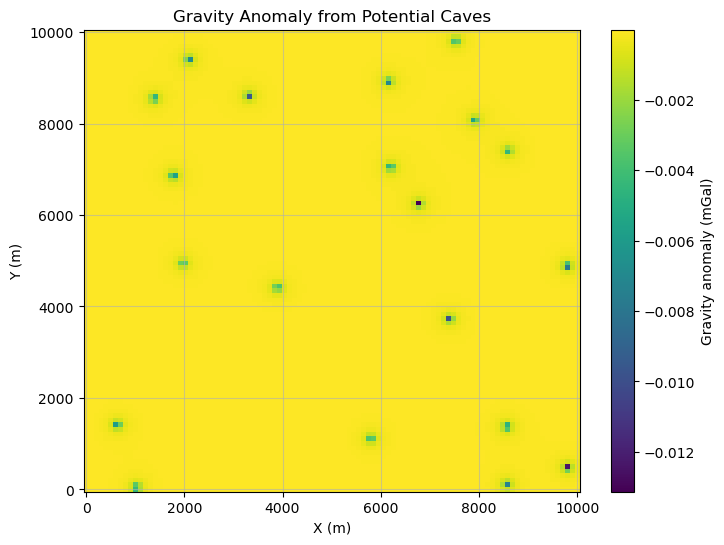

In [37]:
# overhead gravity survey

# Constants
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
rho_rock = 2200  # kg/m^3, typical rock density

# Grid for 10km x 10km, with 100 m spacing
x = np.linspace(0, 10000, 100)
y = np.linspace(0, 10000, 100)
X, Y = np.meshgrid(x, y)

# Initialize gravity anomaly array
gravity_anomaly = np.zeros_like(X)

# Generate random caves
num_caves = 20
for _ in range(num_caves):
    # Random location (m)
    cx = np.random.uniform(0, 10000)
    cy = np.random.uniform(0, 10000)
    # Random depth below surface (10-50 m)
    cz = np.random.uniform(10, 50)
    # Cube size
    a = 10  # x-size in meters
    b = 10  # y-size in meters
    c = 10  # z-size in meters

    # Approximate cube gravity effect at surface (simple point mass approximation)
    # Mass = density * volume, cube volume = a*b*c
    volume = a * b * c
    mass = -rho_rock * volume  # negative because it's a void

    # Distance from cube center to each surface point
    r = np.sqrt((X - cx)**2 + (Y - cy)**2 + cz**2)

    # Simple gravity formula (vertical component)
    g = G * mass / r**2
    gravity_anomaly += g

# Convert to mGal for visualization (1 m/s^2 = 1e5 mGal)
gravity_anomaly_mgal = gravity_anomaly * 1e5

# Plot
plt.figure(figsize=(8,6))
c = plt.pcolormesh(X, Y, gravity_anomaly_mgal, cmap='viridis', shading='auto')
plt.colorbar(c, label='Gravity anomaly (mGal)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True, alpha=0.6)
plt.title('Gravity Anomaly from Potential Caves')
plt.show()
